Import the needed libraries

In [49]:
import netCDF4
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import xarray as xr
import pandas as pd
import geopandas as gpd
import folium
import plotly.graph_objects as go
import plotly.express as px

set a variable to store the path to the netCDF file you want to analyze

In [46]:
path = r"/Users/kevinboyle/Downloads/S5P_NRTI_L2__NO2____20200420T041948_20200420T042448_13049_01_010302_20200420T045750-2.nc"

In [47]:
mapboxToken = 'pk.eyJ1Ijoia2V2aW5ib3lsZTc3MTciLCJhIjoiY2s5aWhoMWk4MTlmODNtbndwemg3YmI2OCJ9.-rsr3AC5aprIBVXe5oL0Zg'

load in the dataset and store it in a variable. the xarray dataset prints out a neatly formatted view of the data attributes

In [5]:
dataset = netCDF4.Dataset(path)

In [6]:
xarrayData = xr.open_dataset(path)

In [7]:
xarrayData

<xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*
Attributes:
    Conventions:                        CF-1.7
    institution:                        KNMI
    source:                             Sentinel 5 precursor, TROPOMI, space-...
    history:                            2020-04-20 05:00:09 f_s5pops tropnll2...
    summary:                            TROPOMI/S5P NO2 1-Orbit L2 Swath 7x3.5km
    tracking_id:                        fe726e65-9ce1-4ab3-8d20-bf0489428f01
    id:                                 S5P_NRTI_L2__NO2____20200420T041948_2...
    time_reference:                     2020-04-20T00:00:00Z
    time_reference_days_since_1950:     25677
    time_reference_julian_day:          2458959.5
    time_reference_seconds_since_1970:  1587340800
    time_coverage_start:                2020-04-20T04:19:43Z
    time_coverage_end:                  2020-04-20T04:24:54Z
    time_coverage_duration:             PT311.633S
    time_coverage_resolution:           PT0.840S
    orbit:                              13049
    references:                         http://www.tropomi.eu/data-products/n...
    processor_version:                  1.3.2
    keywords_vocabulary:                AGU index terms, http://publications....
    keywords:                           0345 Pollution, Urban and Regional; 0...
    standard_name_vocabulary:           NetCDF Climate and Forecast Metadata ...
    naming_authority:                   nl.knmi
    cdm_data_type:                      Swath
    date_created:                       2020-04-20T04:58:10Z
    creator_name:                       The Sentinel 5 Precursor TROPOMI Leve...
    creator_url:                        http://www.tropomi.eu
    creator_email:                      EOSupport@Copernicus.esa.int
    project:                            Sentinel 5 precursor/TROPOMI
    geospatial_lat_min:                 32.3197
    geospatial_lat_max:                 56.392887
    geospatial_lon_min:                 146.04317
    geospatial_lon_max:                 105.9501
    license:                            No conditions apply
    platform:                           S5P
    sensor:                             TROPOMI
    spatial_resolution:                 7x3.5km2
    cpp_compiler_version:               g++ (GCC) 4.8.5 20150623 (Red Hat 4.8...
    cpp_compiler_flags:                 -g -O2 -fPIC -std=c++11 -W -Wall -Wno...
    f90_compiler_version:               GNU Fortran (GCC) 4.8.5 20150623 (Red...
    f90_compiler_flags:                 -gdwarf-3 -O2 -fPIC -cpp -ffpe-trap=i...
    build_date:                         2019-04-05T12:04:00Z
    revision_control_identifier:        
    geolocation_grid_from_band:         4
    identifier_product_doi:             N/A
    identifier_product_doi_authority:   http://dx.doi.org/
    algorithm_version:                  1.3.0
    title:                              TROPOMI/S5P NO2 1-Orbit L2 Swath 7x3.5km
    processing_status:                  NRTI-processing product
    product_version:                    1.1.0
    Status_MET_2D:                      Nominal
    Status_NISE__:                      Nominal
    Status_CTMFCT:                      Nominal

In [8]:
dataset.groups.keys()

odict_keys(['PRODUCT', 'METADATA'])

In [9]:
metadata = dataset.groups['METADATA']

In [10]:
print(metadata)

<class 'netCDF4._netCDF4.Group'>
group /METADATA:
    dimensions(sizes): 
    variables(dimensions): 
    groups: QA_STATISTICS, ALGORITHM_SETTINGS, GRANULE_DESCRIPTION, ISO_METADATA, EOP_METADATA, ESA_METADATA



In [11]:
product = dataset.groups['PRODUCT']

In [12]:
product.variables.keys()

odict_keys(['scanline', 'ground_pixel', 'time', 'corner', 'polynomial_exponents', 'intensity_offset_polynomial_exponents', 'layer', 'vertices', 'latitude', 'longitude', 'delta_time', 'time_utc', 'qa_value', 'nitrogendioxide_tropospheric_column', 'nitrogendioxide_tropospheric_column_precision', 'nitrogendioxide_tropospheric_column_precision_kernel', 'averaging_kernel', 'air_mass_factor_troposphere', 'air_mass_factor_total', 'tm5_tropopause_layer_index', 'tm5_constant_a', 'tm5_constant_b'])

In [13]:
latitude = product.variables['latitude']

In [14]:
latitude[0][0][0:45]

masked_array(data=[32.364525, 32.40721 , 32.449253, 32.49067 , 32.53147 ,
                   32.57168 , 32.61131 , 32.65037 , 32.688885, 32.726864,
                   32.76432 , 32.801266, 32.83771 , 32.873672, 32.90916 ,
                   32.944183, 32.978756, 33.012882, 33.04658 , 33.079853,
                   33.112713, 33.14517 , 33.193108, 33.255695, 33.316814,
                   33.37652 , 33.43487 , 33.491924, 33.54772 , 33.602318,
                   33.655754, 33.708073, 33.75931 , 33.80951 , 33.858704,
                   33.906925, 33.954212, 34.00059 , 34.046093, 34.090748,
                   34.134575, 34.17761 , 34.219868, 34.261375, 34.30216 ],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [15]:
longitude = product.variables['longitude']

In [16]:
longitude[0][0][0:45]

masked_array(data=[117.091576, 117.17803 , 117.26339 , 117.34767 ,
                   117.43091 , 117.51313 , 117.59435 , 117.674614,
                   117.75393 , 117.83231 , 117.909805, 117.98641 ,
                   118.062164, 118.13708 , 118.21117 , 118.284454,
                   118.35695 , 118.42869 , 118.49967 , 118.569916,
                   118.63944 , 118.70827 , 118.81021 , 118.9438  ,
                   119.07482 , 119.20337 , 119.32954 , 119.45342 ,
                   119.575096, 119.69465 , 119.81216 , 119.92768 ,
                   120.04129 , 120.15306 , 120.26305 , 120.3713  ,
                   120.47788 , 120.582855, 120.68626 , 120.78814 ,
                   120.88854 , 120.987526, 121.08512 , 121.181366,
                   121.276306],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [17]:
nitroTropo = product.variables['nitrogendioxide_tropospheric_column']

In [18]:
nitroTropo[0][0][0:45]

masked_array(data=[--, 0.00029333896236494184, 0.00015176030865404755,
                   -8.594623795943335e-05, -0.00018472828378435224,
                   0.00013108020357321948, 3.5782937629846856e-05,
                   0.00013355053670238703, -8.836267079459503e-05,
                   -3.3673582947812974e-05, -0.00012596248416230083,
                   5.52460624021478e-05, -7.561625352536794e-06,
                   6.601205677725375e-05, 2.7593776394496672e-05,
                   -4.817321951122722e-06, -6.170802225824445e-05,
                   3.2219697459368035e-05, 3.379345071152784e-05,
                   -1.8966382413054816e-05, -7.772228855174035e-05,
                   7.08587140252348e-06, 9.318278898717836e-05,
                   8.878078369889408e-05, 0.00019192176114302129,
                   0.0001670387719059363, 6.84849001117982e-05,
                   0.00011642745084827766, 9.710288577480242e-05,
                   8.619252912467346e-05, 3.886307604261674e-05,
 

In [19]:
qaValue = product.variables['qa_value']

In [20]:
qaValue[0][0][0:45]

masked_array(data=[0.        , 0.32999998, 0.32999998, 0.32999998,
                   0.32999998, 0.32999998, 0.32999998, 0.32999998,
                   0.32999998, 0.32999998, 0.32999998, 0.32999998,
                   0.32999998, 0.32999998, 0.32999998, 0.32999998,
                   0.32999998, 0.32999998, 0.32999998, 0.32999998,
                   0.32999998, 0.32999998, 0.32999998, 0.32999998,
                   0.32999998, 0.32999998, 0.32999998, 0.32999998,
                   0.32999998, 0.74      , 0.74      , 0.74      ,
                   0.74      , 0.74      , 0.74      , 0.74      ,
                   0.74      , 0.74      , 0.74      , 0.74      ,
                   0.74      , 0.74      , 0.74      , 0.74      ,
                   0.74      ],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [21]:
nitroTropo[0][0][1:12]

masked_array(data=[0.00029333896236494184, 0.00015176030865404755,
                   -8.594623795943335e-05, -0.00018472828378435224,
                   0.00013108020357321948, 3.5782937629846856e-05,
                   0.00013355053670238703, -8.836267079459503e-05,
                   -3.3673582947812974e-05, -0.00012596248416230083,
                   5.52460624021478e-05],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False],
       fill_value=9.96921e+36,
            dtype=float32)

In [22]:
qaValue[0][0][0:45]

masked_array(data=[0.        , 0.32999998, 0.32999998, 0.32999998,
                   0.32999998, 0.32999998, 0.32999998, 0.32999998,
                   0.32999998, 0.32999998, 0.32999998, 0.32999998,
                   0.32999998, 0.32999998, 0.32999998, 0.32999998,
                   0.32999998, 0.32999998, 0.32999998, 0.32999998,
                   0.32999998, 0.32999998, 0.32999998, 0.32999998,
                   0.32999998, 0.32999998, 0.32999998, 0.32999998,
                   0.32999998, 0.74      , 0.74      , 0.74      ,
                   0.74      , 0.74      , 0.74      , 0.74      ,
                   0.74      , 0.74      , 0.74      , 0.74      ,
                   0.74      , 0.74      , 0.74      , 0.74      ,
                   0.74      ],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [23]:
time  = product.variables['time_utc']

In [24]:
df = pd.DataFrame({'longitude': longitude[0][0],
                  'latitude': latitude[0][0],
                  'nitroTropo': nitroTropo[0][0],
                  'qaValue': qaValue[0][0],
                  'time': time[0][0]})

In [25]:
df = df.dropna()

In [26]:
df['datetime'] = pd.to_datetime(df.time)

In [27]:
df.set_index(df.datetime, inplace=True)

In [28]:
df = df.drop(['time','datetime'], axis=1)

In [29]:
geoDF = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

In [30]:
geoDF.head()

,longitude,latitude,nitroTropo,qaValue,geometry
datetime,,,,,
2020-04-20 04:19:43.197000+00:00,117.178032,32.407211,0.000293,0.33,POINT (117.17803 32.40721)
2020-04-20 04:19:43.197000+00:00,117.263390,32.449253,0.000152,0.33,POINT (117.26339 32.44925)
2020-04-20 04:19:43.197000+00:00,117.347672,32.490669,-0.000086,0.33,POINT (117.34767 32.49067)
2020-04-20 04:19:43.197000+00:00,117.430908,32.531471,-0.000185,0.33,POINT (117.43091 32.53147)
2020-04-20 04:19:43.197000+00:00,117.513130,32.571678,0.000131,0.33,POINT (117.51313 32.57168)


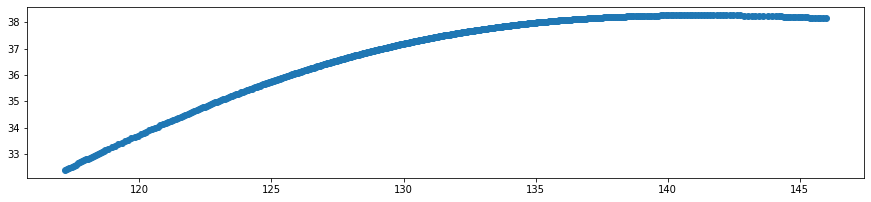

In [31]:
geoDF.plot(figsize=(15,10))

In [68]:
token = 'pk.eyJ1Ijoia2V2aW5ib3lsZTc3MTciLCJhIjoiY2s5aWl6enFpMDI3eDNubjJvZWdiMTdzYSJ9.VKSafIe0zsLVMCswKycFyQ'

In [69]:
df.head()

,longitude,latitude,nitroTropo,qaValue,geometry
datetime,,,,,
2020-04-20 04:19:43.197000+00:00,117.178032,32.407211,0.000293,0.33,POINT (117.17803 32.40721)
2020-04-20 04:19:43.197000+00:00,117.263390,32.449253,0.000152,0.33,POINT (117.26339 32.44925)
2020-04-20 04:19:43.197000+00:00,117.347672,32.490669,-0.000086,0.33,POINT (117.34767 32.49067)
2020-04-20 04:19:43.197000+00:00,117.430908,32.531471,-0.000185,0.33,POINT (117.43091 32.53147)
2020-04-20 04:19:43.197000+00:00,117.513130,32.571678,0.000131,0.33,POINT (117.51313 32.57168)


In [70]:
fig = px.scatter_mapbox(df, lat=df.latitude, lon=df.longitude, color=df.nitroTropo,
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)
fig.update_layout(mapbox_style="dark", mapbox_accesstoken=token)
fig.show()